<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/HW1_Load_and_visualize_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages

In [9]:
!pip install pyreadr

In [37]:
#Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
from plotly.graph_objs import Scatter
import plotly.graph_objs as go
import pyreadr
import warnings
warnings.filterwarnings('ignore')

# Upload the data

In [38]:
#Upload the dataset - best to use the Github path b/c local file paths may move
fight_songs = pd.read_csv('https://raw.githubusercontent.com/550tealeaves/DATA-70500-working-with-data/main/datasets/fight-songs.csv')
fight_songs.head() #shows the first 5 rows of dataset


,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
0,Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908,No,Yes,No,152,64,Yes,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr
1,Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947,Yes,Yes,No,76,99,Yes,4,Yes,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl
2,Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930,Yes,Yes,No,155,55,Yes,5,No,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl
3,Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912,Yes,Yes,No,137,62,No,0,No,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89
4,Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927,Yes,Yes,No,80,67,Yes,6,Yes,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm


# Inspect the data

In [39]:
#show basic descriptive stats of dataset for numeric values
fight_songs.describe()

,bpm,sec_duration,number_fights,trope_count
count,65.000000,65.000000,65.000000,65.000000
mean,128.800000,71.907692,2.846154,3.615385
std,33.152677,25.056014,3.231828,1.674182
min,65.000000,27.000000,0.000000,0.000000
25%,90.000000,58.000000,0.000000,3.000000
50%,140.000000,67.000000,2.000000,4.000000
75%,151.000000,85.000000,5.000000,5.000000
max,180.000000,172.000000,17.000000,8.000000


In [40]:
#shows the number of null values in dataset
fight_songs.isnull()

,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
#provides shape of data - # rows vs # cols
fight_songs.shape

(65, 23)

In [42]:
#tells you cols, # of nulls, and data types
fight_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           65 non-null     object
 1   conference       65 non-null     object
 2   song_name        65 non-null     object
 3   writers          65 non-null     object
 4   year             65 non-null     object
 5   student_writer   65 non-null     object
 6   official_song    65 non-null     object
 7   contest          65 non-null     object
 8   bpm              65 non-null     int64 
 9   sec_duration     65 non-null     int64 
 10  fight            65 non-null     object
 11  number_fights    65 non-null     int64 
 12  victory          65 non-null     object
 13  win_won          65 non-null     object
 14  victory_win_won  65 non-null     object
 15  rah              65 non-null     object
 16  nonsense         65 non-null     object
 17  colors           65 non-null     obje

In [43]:
fight_songs.values

array([['Notre Dame', 'Independent', 'Victory March', ..., 'No', 6,
        '15a3ShKX3XWKzq0lSS48yr'],
       ['Baylor', 'Big 12', 'Old Fight', ..., 'Yes', 5,
        '2ZsaI0Cu4nz8DHfBkPt0Dl'],
       ['Iowa State', 'Big 12', 'Iowa State Fights', ..., 'Yes', 4,
        '3yyfoOXZQCtR6pfRJqu9pl'],
       ...,
       ['Virginia', 'ACC', 'The Good Old Song', ..., 'Yes', 3,
        '4zymLpKnHG2KURvrSUyUy8'],
       ['Virginia Tech', 'ACC', 'Tech Triumph', ..., 'Yes', 5,
        '5v3wGg8VMD8MMYGb8SXBss'],
       ['Wake Forest', 'ACC', "O Here's To Wake Forest", ..., 'No', 3,
        '3u6THWNCTIdCcGIcJ1FQsN']], dtype=object)

In [44]:
fight_songs.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,count
school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id,
Alabama,SEC,Yea Alabama,Ethelred Lundy (Epp) Sykes,1926,Yes,Yes,Yes,153,59,Yes,3,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,6,1lkKK6lbsPYD6n5QZbiH1q,1
North Carolina,ACC,I'm a Tar Heel Born,Unknown,Unknown,Unknown,Yes,No,158,38,No,0,No,No,No,Yes,No,No,No,No,No,1,23cCr6w4YgxQaYlr3eNTUr,1
Northwestern,Big Ten,Go! U Northwestern,Theodore C. Van Etten,1912,Yes,Yes,No,140,57,Yes,1,Yes,Yes,Yes,Yes,No,No,No,No,No,4,4iWO9U49SZ0vvzto7qxRxN,1
Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908,No,Yes,No,152,64,Yes,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr,1
Ohio State,Big Ten,Buckeye Battle Cry,Frank Crumit,1919,No,Yes,Yes,178,89,Yes,1,Yes,Yes,Yes,No,No,Yes,Yes,No,No,5,2faIedehtxwQqYxRRc6T2L,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Michigan State,Big Ten,Victory for MSU,Francis Irving Lankey and Arthur L. Sayles,1915,Yes,Yes,No,145,112,Yes,6,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,5,4BSrPApxbeUNPA5Q8LyfMd,1
Minnesota,Big Ten,The Minnesota Rouser,Floyd Hutsell,1909,No,Yes,Yes,151,60,No,0,No,No,No,Yes,Yes,No,No,No,Yes,3,2EeyLSmHKdZulOKGcTpLS0,1
Mississippi,SEC,Forward Rebels,E.F. Yerby,Unknown,Unknown,Yes,No,153,65,Yes,6,Yes,Yes,Yes,No,No,Yes,No,No,No,4,301ClIQs4cI8poO11mklxg,1


In [ ]:
fight_songs.value_counts(normalize=True, sort=False, ascending=True)

# Visualize the data

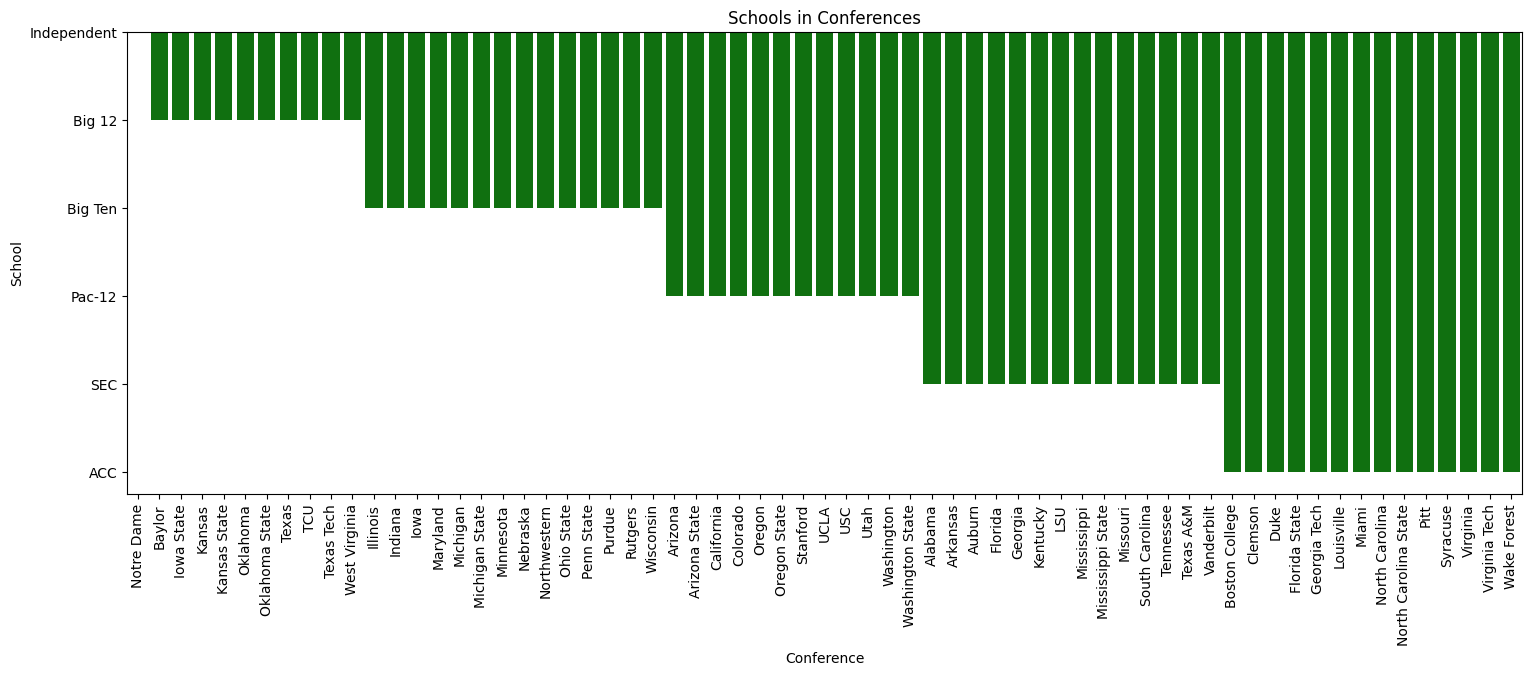

In [81]:
plt.figure(figsize=(18,6)) # These measurements are in inches - use this to adjust size of plot.
sb.barplot(x='school', y='conference', data=fight_songs, color="green")
plt.xlabel('Conference')
plt.ylabel('School')
plt.title('Schools in Conferences')
plt.xticks(rotation=90)
plt.show()

### Interpretation
- SEC, Big Ten, and ACC are tied with 14 schools each.
- Only 1 school is Independent of a conference: Notre Dame, the fighting Irish.
- Despite the name, the Big 10 Conference has 14 schools (dataset is dated, currently there are 18 schools)


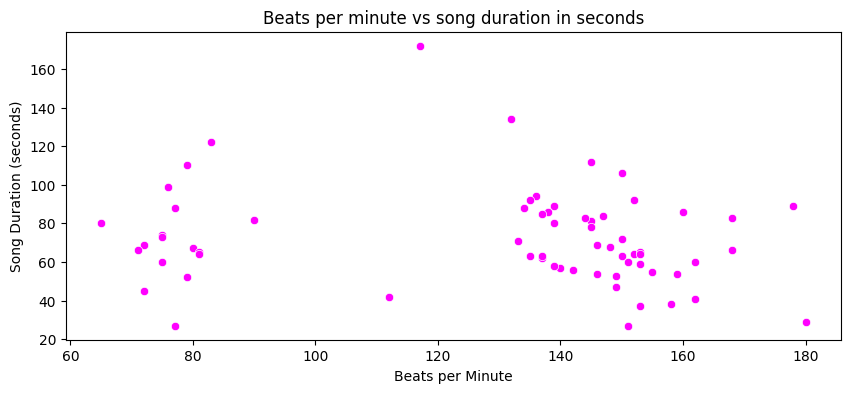

In [82]:
plt.figure(figsize=(10,4)) # These measurements are in inches - edit to adjust plot size.
sb.scatterplot(x='bpm', y='sec_duration', data=fight_songs, color="magenta")
plt.xlabel('Beats per Minute')
plt.ylabel('Song Duration (seconds)')
plt.title('Beats per minute vs song duration in seconds')
plt.show()

### Interpretation
- Not a lot of data on songs with beats per minute btweeen 90 and 130.
- Most of the dataset contains songs with > 130 beats per minute

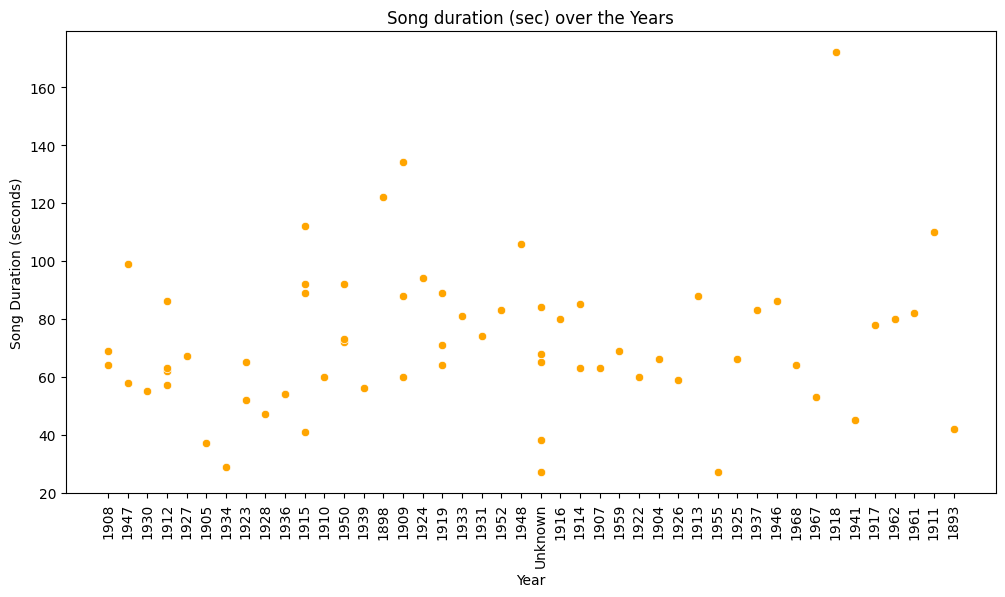

In [88]:
plt.figure(figsize=(12,6)) # These measurements are in inches.
sb.scatterplot(x='year', y='sec_duration', data=fight_songs, color="orange")
plt.xlabel('Year')
plt.ylabel('Song Duration (seconds)')
plt.title('Song duration (sec) over the Years')
plt.xticks(rotation=90)
plt.show()